# Abhijith K S

# GRIP 

**Data Science and Buisness Analytics Internship**

# Task 2


***Prediction using supervised ML***

**?. From the given 'Iris'data set predict the optimum number of clusters and represent it visually.**

*Importing the libraries*

In [54]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


*Loading the data set*

In [55]:
# Load the iris dataset

#iris=pd.read_csv("C:\\Users\\ABHI\\OneDrive\\Documents\\Iris.csv")
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head(10) # See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**To determine the number of clusters for KMeans and to determine the value of K**

In [56]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
  

C:\Users\ABHI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**This is done by using The elbow method. Next we can plot the Graph to view the elbow bend to determine the clusters**

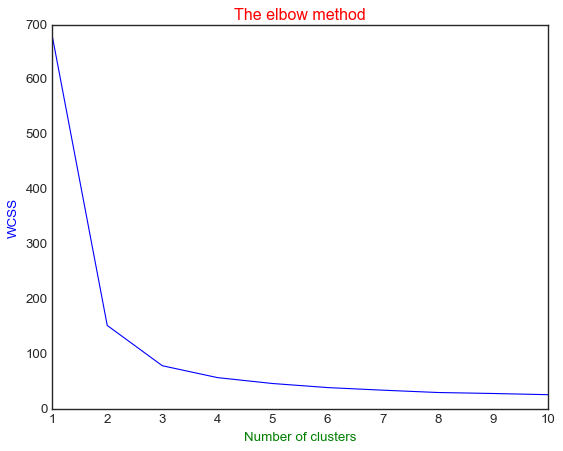

In [60]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.style.use('seaborn-white')
plt.plot(range(1, 11),WCSS)
plt.title('The elbow method',c='Red')
plt.xlabel('Number of clusters',c='green')
plt.ylabel('WCSS',c='blue') # Within cluster sum of squares
plt.show()

*Clearly we can see the elbow bend at 3. So we take the cluster as 3*

In [52]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

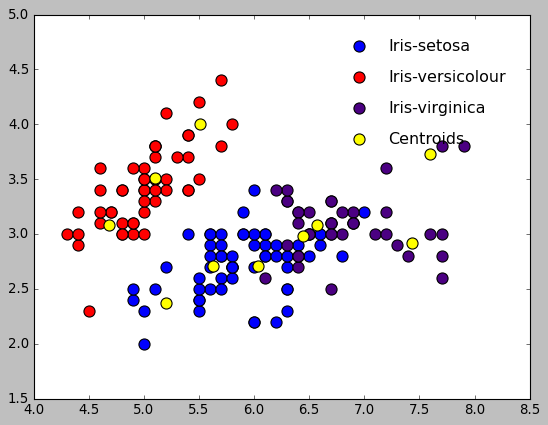

In [62]:
# Visualising the clusters - On the first two columns
plt.style.use('classic')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'indigo', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc='upper right',scatterpoints=1,frameon=False,labelspacing=1,fancybox=True,framealpha=1,shadow=True,borderpad=1)

**This is KMeans Clustering**